In [2]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
# Загрузка данных MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Подготовка данных
train_images = train_images / 255.0  # Нормализация изображений
test_images = test_images / 255.0    # Нормализация изображений
train_labels = to_categorical(train_labels)  # One-hot кодирование меток
test_labels = to_categorical(test_labels)    # One-hot кодирование меток


In [5]:
# Построение модели
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Преобразование 2D в 1D
model.add(Dense(128, activation='relu'))  # Полносвязный слой с 128 нейронами и ReLU активацией
model.add(Dense(10, activation='softmax'))  # Выходной слой с 10 нейронами для классификации


C:\Users\rober\OneDrive\Desktop\Deep learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
# Компиляция модели
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
# Обучение модели
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8691 - loss: 0.4678 - val_accuracy: 0.9557 - val_loss: 0.1575
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9598 - loss: 0.1394 - val_accuracy: 0.9655 - val_loss: 0.1207
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9734 - loss: 0.0886 - val_accuracy: 0.9672 - val_loss: 0.1037
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9813 - loss: 0.0652 - val_accuracy: 0.9705 - val_loss: 0.1013
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9850 - loss: 0.0496 - val_accuracy: 0.9731 - val_loss: 0.0873
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9888 - loss: 0.0374 - val_accuracy: 0.9731 - val_loss: 0.0881
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9907 - loss: 0.0302 - val_accuracy: 0.9744 - val_loss: 0.0920
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9941 - loss: 0.0220 - 

In [8]:
# Оценка модели
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.9742 - loss: 0.0962
Test accuracy: 0.9775999784469604


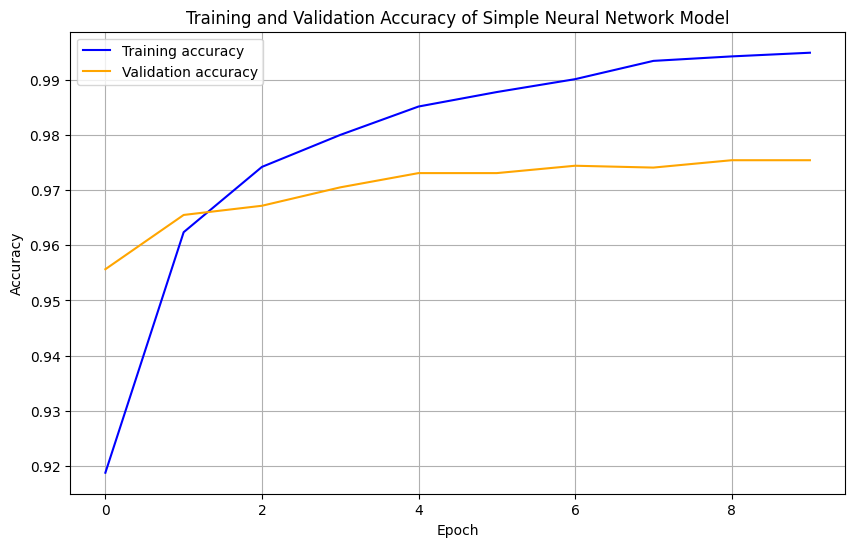

In [10]:
# Визуализация результатов обучения для простой модели
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy of Simple Neural Network Model')
plt.legend()
plt.grid(True) 
plt.show()

In [11]:
# Сохранение модели с использованием pickle
import pickle

In [12]:
# Открытие файла для записи в бинарном режиме
with open('model.pkl', 'wb') as file:
    # Сохранение модели в файл
    pickle.dump(model, file)